           Date          Open          High           Low         Close  \
361  2023-05-02  28087.175781  28881.298828  27924.123047  28680.537109   
362  2023-05-03  28680.494141  29259.533203  28178.388672  29006.308594   
363  2023-05-04  29031.304688  29353.185547  28694.039063  28847.710938   
364  2023-05-05  28851.480469  29668.908203  28845.509766  29534.384766   
365  2023-05-06  29538.859375  29820.126953  28468.966797  28904.623047   

          Volume  
361  16432924527  
362  19122972518  
363  15548678514  
364  17936566518  
365  15913866714  
Above is data_training
Above  is data_test
Above is training_data.head())
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
           

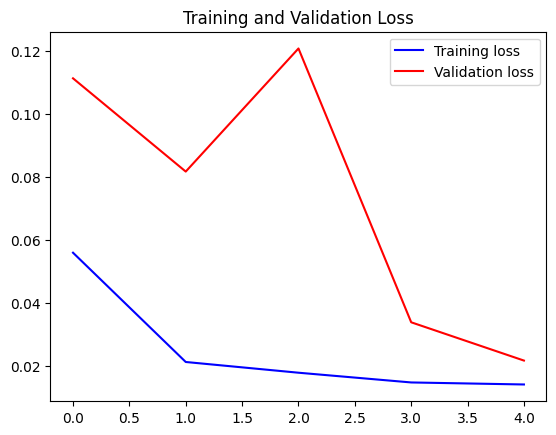

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import IPython
from IPython.display import display, HTML, Javascript


def preprocess_data(data_url):
    df = pd.read_csv(data_url)
    df = df.drop(['Adj Close'], axis=1)
    #df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    return df


def configure_browser_state():
  display(IPython.core.display.HTML('''
    <canvas id="myChart"></canvas>
  '''))
  display(IPython.core.display.HTML('''
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.8.0"></script>
        <script>
          var ctx = document.getElementById('myChart').getContext('2d');
          var chart = new Chart(ctx, {
              // The type of chart we want to create
              type: 'line',

              // The data for our dataset
              data: {
                  labels: [],
                  datasets: [{
                      label: 'Actual',
                      borderColor: 'rgb(255, 99, 132)',
                      data: []
                  }, 
                  {
                      label: 'Predicted',
                      borderColor: 'rgb(155, 199, 32)',
                      data: []
                  }]
              },

              // Configuration options go here
            //  options: { animation: {duration: 0} ,
            //    scales: {x: {
             //              type: 'time',
             //              time: { unit: 'day',displayFormats: {day: 'YYYY-MM-DD'},tooltipFormat: 'YYYY-MM-DD'},
             //              title: {display: true, text: 'Date'}},
             //          y: {
             //              title: { display: true, text: 'value'}},
              //           //xAxes: [{ type : 'time', scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}],
              //            xAxes: [{type: 'time',time: {unit: 'day',displayFormats: {day: 'YYYY-MM-DD'}},scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}],
               //         yAxes: [{scaleLabel: {display: true, labelString: 'BitCoin Price [Normalised]'} }], },
               // title: { display: true, text: 'Bitcoin Price - Realtime Prediction'}}});

                             // Configuration options go here
              options: { animation: {duration: 0} ,
                scales: {x: {
                           type: 'time',
                           time: { unit: 'day',unitStepSize: 1,displayFormats: {day: 'YYYY-MM-DD'},tooltipFormat: 'YYYY-MM-DD'},
                           title: {display: true, text: 'Date'}},
                         y: {
                           title: { display: true, text: 'value'}},
                         xAxes: [{ scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}], 
                        // xAxes : [time: { unit: 'day',unitStepSize: 1,displayFormats: {day: 'YYYY MM DD'},tooltipFormat: 'YYYY MM DD'},],
                        yAxes: [{scaleLabel: {display: true, labelString: 'BitCoin Price [$USD Normalised]'} }], },
                title: { display: true, text: 'Bitcoin Price - Realtime Prediction'}}});


          function getEpoch(offset_sec=0) {
             var now     = new Date(); 
             return Math.floor((now.getTime() - offset_sec*1000)/1000);}

          function getDateTime(offset_sec=0) {
             var now     = new Date(); 
             var numberOfMlSeconds = now.getTime() + offset_sec*1000;
             var update_now = new Date (numberOfMlSeconds);
             var year    = update_now.getFullYear();
             var month   = update_now.getMonth()+1; 
             var day     = update_now.getDate();
             var hour    = update_now.getHours();
             var minute  = update_now.getMinutes();
             var second  = update_now.getSeconds(); 
             if(month.toString().length == 1) {
                 month = '0'+month;}
             if(day.toString().length == 1) {
                 day = '0'+day;}   
             if(hour.toString().length == 1) {
                 hour = '0'+hour;}
             if(minute.toString().length == 1) {
                 minute = '0'+minute; }
             if(second.toString().length == 1) {
                 second = '0'+second;}   
             //var dateTime = year+'-'+month+'-'+day+' '+hour+':'+minute+':'+second;   
             var dateTime = year+'-'+month+'-'+day;  
             return dateTime;
          }

          function addData(current, predicted, day){
            chart.data.labels.push(day)
            if (chart.data.datasets[1].data.length > 0)
            //chart.data.datasets[0].data[chart.data.datasets[0].data.length - 1] = current
               chart.data.datasets[0].data.push(current)
            chart.data.datasets[1].data.push(predicted)
            // optional windowing
            if(chart.data.labels.length > 100) {
              chart.data.labels.shift()
              chart.data.datasets[0].data.shift()
              chart.data.datasets[1].data.shift() 
            }
            chart.update();
          }
        </script>
        '''))
    

url = 'https://raw.githubusercontent.com/AnsonCNS/COMS4507/main/BTC-USD_2023-05-07.csv'
data = preprocess_data(url)
#data = pd.read_csv(SKELETON_DIR+'BTC-USD.csv', date_parser = True)
print(data.tail())

data_training = data[data['Date']< '2023-05-01'].copy()
data_training
print("Above is data_training")

data_test = data[data['Date']< '2023-05-01'].copy()
data_test
print("Above  is data_test")


training_data = data_training.drop(['Date'], axis = 1)
training_data.head()
print("Above is training_data.head())")

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))

model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history= model.fit(X_train, Y_train, epochs = 5, batch_size =50, validation_split=0.1)
                   
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()




In [21]:
# Ready graph display
configure_browser_state() 

part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
days = df['Date']
df = df.drop(['Date'], axis = 1)
df.head()

print("days=",days)
inputs = scaler.transform(df) 
inputs

X_test = []
Y_test = []
Y_pred = -1
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
    x1 = X_test[-1][-1]
    y1 = Y_test[-1]
    print("x1=",x1)
    print("y1=",y1)
    #if Y_pred != -1:
    #    model.train_on_batch(x1, y1)
    Y_pred = model.predict(np.array(X_test))
    display(Javascript('addData('+str(Y_test[-1])+','+str(Y_pred[-1])+',"'+str(days[i])+'")'))

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



days= 0      2023-03-02
1      2023-03-03
2      2023-03-04
3      2023-03-05
4      2023-03-06
          ...    
415    2023-04-26
416    2023-04-27
417    2023-04-28
418    2023-04-29
419    2023-04-30
Name: Date, Length: 420, dtype: object
x1= [0.64755378 0.67246438 0.67972218 0.66563462 0.06234342]
y1= 1.0
1/1 [==============================] - 0s 66ms/step


<ipython-input-21-3c30bc299741>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


<IPython.core.display.Javascript object>

x1= [1.       1.       1.       1.       0.270322]
y1= 0.9744753653429192
1/1 [==============================] - 0s 69ms/step


<IPython.core.display.Javascript object>

x1= [0.97447537 0.97572893 0.97277542 0.97338904 0.14972568]
y1= 0.948523485143651
1/1 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

x1= [0.94852349 0.94495112 0.91937026 0.90215801 0.26104309]
y1= 0.8791216327077471
1/1 [==============================] - 0s 76ms/step


<IPython.core.display.Javascript object>

x1= [0.87912163 0.88207509 0.73921655 0.71639817 0.50001688]
y1= 0.6970052039800316
1/1 [==============================] - 0s 66ms/step


<IPython.core.display.Javascript object>

x1= [0.6970052  0.80226846 0.7215055  0.75224127 0.46816453]
y1= 0.7327193823378508
1/1 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

x1= [0.73271938 0.77365439 0.63226439 0.64922023 0.56322237]
y1= 0.6327020219542998
1/1 [==============================] - 0s 73ms/step


<IPython.core.display.Javascript object>

x1= [0.63270202 0.67641161 0.54073313 0.6547203  0.53267103]
y1= 0.6372316892054237
1/1 [==============================] - 0s 49ms/step


<IPython.core.display.Javascript object>

x1= [0.63723169 0.72021651 0.6630401  0.66634051 0.31566395]
y1= 0.6494838106901699
1/1 [==============================] - 0s 48ms/step


<IPython.core.display.Javascript object>

x1= [0.64948381 0.68428362 0.65904575 0.70673632 0.18750479]
y1= 0.6885847650513617
1/1 [==============================] - 0s 49ms/step


<IPython.core.display.Javascript object>

x1= [0.68858477 0.73903654 0.70052976 0.76617491 0.1628413 ]
y1= 0.7465808142256687
1/1 [==============================] - 0s 52ms/step


<IPython.core.display.Javascript object>

x1= [0.74658081 0.73889666 0.68665588 0.69496818 0.2237567 ]
y1= 0.6772250870076604
1/1 [==============================] - 0s 71ms/step


<IPython.core.display.Javascript object>

x1= [0.67722509 0.70891078 0.7026704  0.72276267 0.19219221]
y1= 0.7042595481248455
1/1 [==============================] - 0s 57ms/step


<IPython.core.display.Javascript object>

x1= [0.70425955 0.70519117 0.65991892 0.63855133 0.21181694]
y1= 0.6222948159714587
1/1 [==============================] - 0s 62ms/step


<IPython.core.display.Javascript object>

x1= [0.62229482 0.69596423 0.65934977 0.71725633 0.23417703]
y1= 0.6988071882602072
1/1 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

x1= [0.69880719 0.707462   0.66360718 0.66227392 0.20700118]
y1= 0.6453578097035084
1/1 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.64535781 0.65463734 0.67536537 0.67370329 0.08591185]
y1= 0.6565460446184086
1/1 [==============================] - 0s 65ms/step


<IPython.core.display.Javascript object>

x1= [0.65654604 0.69572415 0.68782767 0.71771988 0.12506338]
y1= 0.6987243318940062
1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

x1= [0.69872433 0.70381026 0.67275843 0.65724618 0.21359794]
y1= 0.640608883172199
1/1 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.64060888 0.66374262 0.66325434 0.6847314  0.16986098]
y1= 0.6671594520424562
1/1 [==============================] - 0s 74ms/step


<IPython.core.display.Javascript object>

x1= [0.66715945 0.68256466 0.69334823 0.68012855 0.17802576]
y1= 0.6629096362556655
1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

x1= [0.66290964 0.66667835 0.6368659  0.66555651 0.26114449]
y1= 0.6478243355581939
1/1 [==============================] - 0s 71ms/step


<IPython.core.display.Javascript object>

x1= [0.64782434 0.64276154 0.64012027 0.63397451 0.25941621]
y1= 0.6175939874458471
1/1 [==============================] - 0s 81ms/step


<IPython.core.display.Javascript object>

x1= [0.61759399 0.61664427 0.65158495 0.64322352 0.24986867]
y1= 0.6367005444676401
1/1 [==============================] - 0s 61ms/step


<IPython.core.display.Javascript object>

x1= [0.63670054 0.65017718 0.66599624 0.67438122 0.09327223]
y1= 0.6570699558971151
1/1 [==============================] - 0s 72ms/step


<IPython.core.display.Javascript object>

x1= [0.65706996 0.77052393 0.68925545 0.786975   0.28364377]
y1= 0.7667574578907324
1/1 [==============================] - 0s 77ms/step


<IPython.core.display.Javascript object>

x1= [0.76675746 0.78526193 0.78896744 0.79022972 0.23206306]
y1= 0.7700612836405967
1/1 [==============================] - 0s 73ms/step


<IPython.core.display.Javascript object>

x1= [0.77006128 0.77089967 0.69921445 0.69181626 0.30033916]
y1= 0.6739776261563213
1/1 [==============================] - 0s 79ms/step


<IPython.core.display.Javascript object>

x1= [0.67397763 0.70450479 0.70681474 0.72481814 0.19203124]
y1= 0.7063435445279664
1/1 [==============================] - 0s 85ms/step


<IPython.core.display.Javascript object>

x1= [0.70634354 0.70589404 0.69288251 0.68714108 0.16589829]
y1= 0.6697088342152449
1/1 [==============================] - 0s 90ms/step


<IPython.core.display.Javascript object>

x1= [0.66970883 0.6714107  0.69913488 0.69348677 0.07974288]
y1= 0.6759124436126944
1/1 [==============================] - 0s 76ms/step


<IPython.core.display.Javascript object>

x1= [0.67591244 0.6805991  0.70287894 0.697128   0.0858152 ]
y1= 0.6795277790304382
1/1 [==============================] - 0s 89ms/step


<IPython.core.display.Javascript object>

x1= [0.67952778 0.75794056 0.71895986 0.76941179 0.21776663]
y1= 0.749821041617931
2/2 [==============================] - 0s 24ms/step


<IPython.core.display.Javascript object>

x1= [0.74982104 0.74794574 0.6896634  0.75878687 0.29706048]
y1= 0.7392268922024825
2/2 [==============================] - 0s 27ms/step


<IPython.core.display.Javascript object>

x1= [0.73922689 0.73636121 0.72148546 0.71232    0.20244211]
y1= 0.6941974828974282
2/2 [==============================] - 0s 27ms/step


<IPython.core.display.Javascript object>

x1= [0.69419748 0.70472943 0.72530083 0.70726622 0.12560682]
y1= 0.6891496347639963
2/2 [==============================] - 0s 26ms/step


<IPython.core.display.Javascript object>

x1= [0.68914963 0.68688561 0.67288849 0.65650036 0.19907591]
y1= 0.6398172388659886
2/2 [==============================] - 0s 27ms/step


<IPython.core.display.Javascript object>

x1= [0.63981724 0.64546007 0.63557368 0.62080336 0.17552311]
y1= 0.60561222937234
2/2 [==============================] - 0s 28ms/step


<IPython.core.display.Javascript object>

x1= [0.60561223 0.60131807 0.56146222 0.54189595 0.23767973]
y1= 0.5269269921116553
2/2 [==============================] - 0s 28ms/step


<IPython.core.display.Javascript object>

x1= [0.52692699 0.51751906 0.32903398 0.33080993 0.5435931 ]
y1= 0.3225301016466269
2/2 [==============================] - 0s 29ms/step


<IPython.core.display.Javascript object>

x1= [0.3225301  0.332129   0.26916202 0.31695584 0.38820724]
y1= 0.3085212756809548
2/2 [==============================] - 0s 35ms/step


<IPython.core.display.Javascript object>

x1= [0.30852128 0.31365796 0.23031284 0.33502898 0.42413925]
y1= 0.326778038629119
2/2 [==============================] - 0s 31ms/step


<IPython.core.display.Javascript object>

x1= [0.32677804 0.32476427 0.23468086 0.22684153 0.21090667]
y1= 0.2214152237018816
2/2 [==============================] - 0s 34ms/step


<IPython.core.display.Javascript object>

x1= [0.22141522 0.24496531 0.23776353 0.23127689 0.17449727]
y1= 0.22563375697864851
2/2 [==============================] - 0s 39ms/step


<IPython.core.display.Javascript object>

x1= [0.22563376 0.22006404 0.10609903 0.15949522 0.30818996]
y1= 0.15528929637279465
2/2 [==============================] - 0s 38ms/step


<IPython.core.display.Javascript object>

x1= [0.1552893  0.21750069 0.12413091 0.23531513 0.24816451]
y1= 0.2294789670988272
2/2 [==============================] - 0s 41ms/step


<IPython.core.display.Javascript object>

x1= [0.22947897 0.22876654 0.20570866 0.23759944 0.20762194]
y1= 0.23144732161114323
2/2 [==============================] - 0s 40ms/step


<IPython.core.display.Javascript object>

x1= [0.23144732 0.26348726 0.24221671 0.24308292 0.19101263]
y1= 0.23746530276785316
2/2 [==============================] - 0s 35ms/step


<IPython.core.display.Javascript object>

x1= [0.2374653  0.22495862 0.21370079 0.20735757 0.18745918]
y1= 0.2022187647737188
2/2 [==============================] - 0s 38ms/step


<IPython.core.display.Javascript object>

x1= [0.20221876 0.23968579 0.21883275 0.26161191 0.16601107]
y1= 0.2550323478176011
2/2 [==============================] - 0s 40ms/step


<IPython.core.display.Javascript object>

x1= [0.25503235 0.25623633 0.26044573 0.26880959 0.15495484]
y1= 0.26219707181416263
2/2 [==============================] - 0s 49ms/step


<IPython.core.display.Javascript object>

x1= [0.26219707 0.25859239 0.26985444 0.28217419 0.09577635]
y1= 0.2748413047870706
2/2 [==============================] - 0s 44ms/step


<IPython.core.display.Javascript object>

x1= [0.2748413  0.27149341 0.27245382 0.25871949 0.09267269]
y1= 0.2523191317648066
2/2 [==============================] - 0s 43ms/step


<IPython.core.display.Javascript object>

x1= [0.25231913 0.25649021 0.25253386 0.24431139 0.11907982]
y1= 0.2380487728931533
2/2 [==============================] - 0s 46ms/step


<IPython.core.display.Javascript object>

x1= [0.23804877 0.24109277 0.23284945 0.221854   0.12281677]
y1= 0.21638663357704924
2/2 [==============================] - 0s 47ms/step


<IPython.core.display.Javascript object>

x1= [0.21638663 0.20180872 0.21821281 0.21313402 0.14232837]
y1= 0.2080725363088025
2/2 [==============================] - 0s 45ms/step


<IPython.core.display.Javascript object>

x1= [0.20807254 0.19086215 0.15745088 0.19736911 0.16672229]
y1= 0.19422791991665866
2/2 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

x1= [0.19422792 0.21498979 0.17475467 0.17192383 0.20716446]
y1= 0.1679839758808226
2/2 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

x1= [0.16798398 0.15309275 0.17240961 0.17058524 0.09333093]
y1= 0.16640923587124834
2/2 [==============================] - 0s 65ms/step


<IPython.core.display.Javascript object>

x1= [0.16640924 0.16224884 0.16938539 0.17329193 0.0779676 ]
y1= 0.16906514762336844
2/2 [==============================] - 0s 62ms/step


<IPython.core.display.Javascript object>

x1= [0.16906515 0.19663438 0.17421941 0.21941627 0.12473183]
y1= 0.21370197576323569
2/2 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

x1= [0.21370198 0.21512699 0.18820949 0.2173847  0.17075101]
y1= 0.2122237136193703
2/2 [==============================] - 0s 66ms/step


<IPython.core.display.Javascript object>

x1= [0.21222371 0.21316651 0.21246525 0.235067   0.1517301 ]
y1= 0.2292117037483491
2/2 [==============================] - 0s 57ms/step


<IPython.core.display.Javascript object>

x1= [0.2292117  0.27090885 0.23623378 0.288852   0.16265798]
y1= 0.28160677777179877
2/2 [==============================] - 0s 59ms/step


<IPython.core.display.Javascript object>

x1= [0.28160678 0.29757012 0.28458391 0.2934699  0.37909723]
y1= 0.2854389300049007
3/3 [==============================] - 0s 45ms/step


<IPython.core.display.Javascript object>

x1= [0.28543893 0.27607898 0.29406452 0.28661137 0.19704182]
y1= 0.27939069972381936
3/3 [==============================] - 0s 65ms/step


<IPython.core.display.Javascript object>

x1= [0.2793907  0.26203675 0.25791148 0.25048167 0.18848377]
y1= 0.2440518173584878
3/3 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.24405182 0.22597002 0.21754632 0.20654425 0.1476979 ]
y1= 0.20144280864212483
3/3 [==============================] - 0s 72ms/step


<IPython.core.display.Javascript object>

x1= [0.20144281 0.18606546 0.18656482 0.17461702 0.16261527]
y1= 0.17044355003454859
3/3 [==============================] - 0s 66ms/step


<IPython.core.display.Javascript object>

x1= [0.17044355 0.19488214 0.17104519 0.2184689  0.22760772]
y1= 0.21303405227365135
3/3 [==============================] - 0s 61ms/step


<IPython.core.display.Javascript object>

x1= [0.21303405 0.22270764 0.20571308 0.23613712 0.21067992]
y1= 0.2304305936448452
3/3 [==============================] - 0s 72ms/step


<IPython.core.display.Javascript object>

x1= [0.23043059 0.23980765 0.24130827 0.24929072 0.16347218]
y1= 0.2429816367317139
3/3 [==============================] - 0s 68ms/step


<IPython.core.display.Javascript object>

x1= [0.24298164 0.25827284 0.24743903 0.26676848 0.14907018]
y1= 0.2603420106632295
3/3 [==============================] - 0s 51ms/step


<IPython.core.display.Javascript object>

x1= [0.26034201 0.26250606 0.26047933 0.24647718 0.13671234]
y1= 0.24047133414045663
3/3 [==============================] - 0s 52ms/step


<IPython.core.display.Javascript object>

x1= [0.24047133 0.31318481 0.26066704 0.33072603 0.28990273]
y1= 0.3215615656214319
3/3 [==============================] - 0s 45ms/step


<IPython.core.display.Javascript object>

x1= [0.32156157 0.36393901 0.30600679 0.37534736 0.36890083]
y1= 0.36606866064586296
3/3 [==============================] - 0s 56ms/step


<IPython.core.display.Javascript object>

x1= [0.36606866 0.3899489  0.37272395 0.36756105 0.31648554]
y1= 0.3583734494593538
3/3 [==============================] - 0s 53ms/step


<IPython.core.display.Javascript object>

x1= [0.35837345 0.35026092 0.34361374 0.36424789 0.23289703]
y1= 0.3550330805281905
3/3 [==============================] - 0s 50ms/step


<IPython.core.display.Javascript object>

x1= [0.35503308 0.36418273 0.35227777 0.34204692 0.21304169]
y1= 0.3330634709590192
3/3 [==============================] - 0s 55ms/step


<IPython.core.display.Javascript object>

x1= [0.33306347 0.33008003 0.32207592 0.32972814 0.14654358]
y1= 0.32144902383948604
3/3 [==============================] - 0s 47ms/step


<IPython.core.display.Javascript object>

x1= [0.32144902 0.3299225  0.33736177 0.33682245 0.14244299]
y1= 0.3282619372339781
3/3 [==============================] - 0s 49ms/step


<IPython.core.display.Javascript object>

x1= [0.32826194 0.31397454 0.28982401 0.27523041 0.25036278]
y1= 0.2683301312011488
3/3 [==============================] - 0s 50ms/step


<IPython.core.display.Javascript object>

x1= [0.26833013 0.25074837 0.26041076 0.2692094  0.18790743]
y1= 0.26270501306393945
3/3 [==============================] - 0s 51ms/step


<IPython.core.display.Javascript object>

x1= [0.26270501 0.33053745 0.27519671 0.35269045 0.21607374]
y1= 0.3439651845629399
3/3 [==============================] - 0s 57ms/step


<IPython.core.display.Javascript object>

x1= [0.34396518 0.38571021 0.35825519 0.39778546 0.29204072]
y1= 0.3878099926068781
3/3 [==============================] - 0s 53ms/step


<IPython.core.display.Javascript object>

x1= [0.38780999 0.39475805 0.39642372 0.39584734 0.25317276]
y1= 0.3854823121310045
3/3 [==============================] - 0s 54ms/step


<IPython.core.display.Javascript object>

x1= [0.38548231 0.40839453 0.40141963 0.38851899 0.18362575]
y1= 0.3785202197897646
3/3 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.37852022 0.38625862 0.38608978 0.3727534  0.14233602]
y1= 0.3633524385158102
3/3 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.36335244 0.35401448 0.3667313  0.37163275 0.1629652 ]
y1= 0.3619919789213617
3/3 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>

x1= [0.36199198 0.35157251 0.35764253 0.35503909 0.1857918 ]
y1= 0.3462576369531867
3/3 [==============================] - 0s 81ms/step


<IPython.core.display.Javascript object>

x1= [0.34625764 0.35960387 0.35954122 0.34854102 0.16691038]
y1= 0.33985637486167075
3/3 [==============================] - 0s 61ms/step


<IPython.core.display.Javascript object>

x1= [0.33985637 0.34091874 0.34635742 0.33789845 0.15641465]
y1= 0.329208396996028
3/3 [==============================] - 0s 61ms/step


<IPython.core.display.Javascript object>

x1= [0.3292084  0.35195477 0.35271843 0.37040409 0.19021315]
y1= 0.36117384309937717
3/3 [==============================] - 0s 64ms/step


<IPython.core.display.Javascript object>

x1= [0.36117384 0.34722922 0.37027615 0.35420773 0.0742601 ]
y1= 0.3454016427580353
3/3 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

x1= [0.34540164 0.34882201 0.3669204  0.36480392 0.07343834]
y1= 0.3557918453743918
3/3 [==============================] - 0s 68ms/step


<IPython.core.display.Javascript object>

x1= [0.35579185 0.39028619 0.38110281 0.39608698 0.18746593]
y1= 0.38618771825213494
3/3 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

x1= [0.38618772 0.37531051 0.37131827 0.36423255 0.14235514]
y1= 0.35499202815885744


KeyboardInterrupt: ignored